In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Handling Outliers

In [ ]:
salaries = pd.read_csv("https://raw.githubusercontent.com/MohamedMostafa259/Pandas-Notes/refs/heads/main/Data/salaries.csv")
salaries

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0
2,2020,Big Data Engineer,Senior,FT,GB,M,50,104100.0
3,2020,Product Data Analyst,Mid,FT,HN,S,0,19097.0
4,2020,Machine Learning Engineer,Senior,FT,US,L,50,143225.0
...,...,...,...,...,...,...,...,...
602,2022,Data Engineer,Senior,FT,US,M,100,147044.0
603,2022,Data Engineer,Senior,FT,US,M,100,120309.0
604,2022,Data Analyst,Senior,FT,US,M,0,123174.0
605,2022,Data Analyst,Senior,FT,US,M,100,143225.0


In [ ]:
q1 = salaries["Salary_USD"].quantile(0.25)
q3 = salaries["Salary_USD"].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

salaries[(salaries["Salary_USD"] < lower) | (salaries["Salary_USD"] > upper)]
# Notice how none of them are entry level and they are all based in the US

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD
25,2020,Director of Data Science,Executive,FT,US,L,100,310321.0
33,2020,Research Scientist,Mid,FT,US,M,0,429675.0
63,2020,Data Scientist,Senior,FT,US,L,100,393392.0
97,2021,Financial Data Analyst,Mid,FT,US,L,100,429675.0
157,2021,Applied Machine Learning Scientist,Mid,FT,US,L,50,403895.0
225,2021,Principal Data Scientist,Executive,CT,US,S,100,397211.0
252,2021,Principal Data Engineer,Executive,FT,US,L,100,572900.0
482,2022,Data Engineer,Executive,FT,US,M,100,309366.0
519,2022,Applied Data Scientist,Senior,FT,US,L,100,362837.0
523,2022,Data Analytics Lead,Senior,FT,US,L,100,386708.0


### Why look for outliers?
-   Outliers are extreme values → may not accurately represent our data
-   Can change the mean and standard deviation
-   Statistical tests and machine learning models need normally distributed data

### What to do about outliers?
**Questions to ask:**
-   Why do these outliers exist?
	-   More senior roles / different countries pay more
	-   Consider leaving them in a dataset alone (they could be representative of a subset of our data)
-   Is the data accurate?
	-   Could there have been an error in data collection?
		-   If so, remove them

<br>

**To highlight the impact of removing outliers:**
1.   let's plot a histogram of the original dataset containing the outliers
2.   plot without outliers

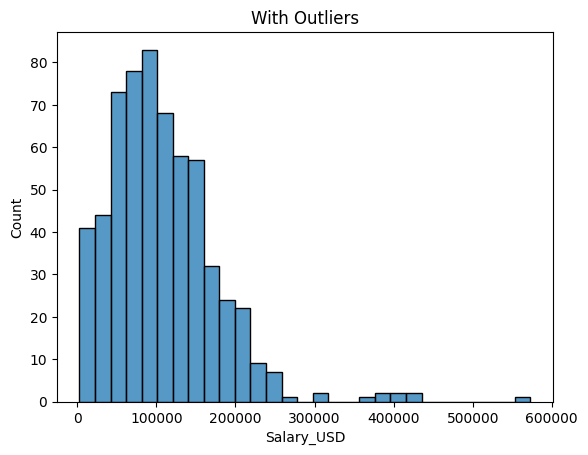

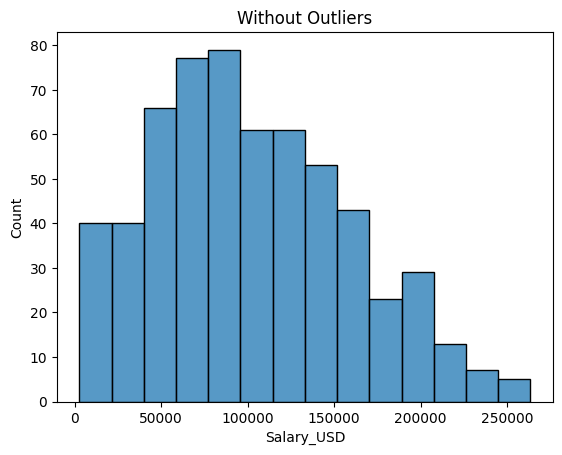

In [ ]:
sns.histplot(data=salaries, x="Salary_USD")
plt.title("With Outliers")
plt.show()

no_outliers = salaries[(salaries["Salary_USD"] > lower) & (salaries["Salary_USD"] < upper)]
sns.histplot(data=no_outliers, x="Salary_USD")
plt.title("Without Outliers")
plt.show()